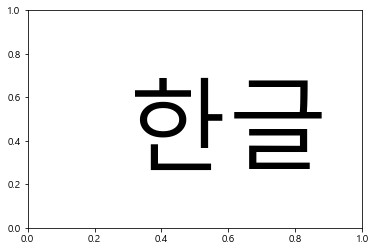

In [1]:
# Import Libraries

import lime
from lime import lime_tabular

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.text(0.3, 0.3, '한글', size=100)
plt.rc('axes',unicode_minus=False)

import numpy as np

import pandas as pd
import shap
shap.initjs()

import seaborn as sns

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

from xgboost import XGBClassifier

In [2]:
# Import data

df = pd.read_excel("Dataset_with SQ.xlsx")
df.head()

,pid,gid,Gender,Age,Number_cars_owned,Mileage,Number_students,Policy_understanding,Tech_understanding,Education_level,...,electric,hydrogen,Gu_AB,SQ_average_price,SQ_1_class,SQ_1_fuel,SQ_2_class,SQ_2_fuel,SQ_3_class,SQ_3_fuel
0,31,1,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
1,31,2,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
2,31,3,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
3,31,4,1,31,1,10000,0,3,2,2,...,0,0,2,3000.0,5,1,0,0,0,0
4,31,5,1,31,1,10000,0,3,2,2,...,0,1,2,3000.0,5,1,0,0,0,0


In [3]:
y=df.lca.copy()
display(y.head())

x=df.drop(['choice',
           'Gu_AB',
          'pid',
          'gid',
           'lca',
           'gasoline',
           'diesel',
           'electric',
           'hydrogen',],axis=1)
display(x.head())

0    3
1    3
2    3
3    1
4    4
Name: lca, dtype: int64

,Gender,Age,Number_cars_owned,Mileage,Number_students,Policy_understanding,Tech_understanding,Education_level,Household_income,Political_orientation,...,class_type_h,fuel_cost_h,price_h,SQ_average_price,SQ_1_class,SQ_1_fuel,SQ_2_class,SQ_2_fuel,SQ_3_class,SQ_3_fuel
0,1,31,1,10000,0,3,2,2,580,3,...,2,50,4000,3000.0,5,1,0,0,0,0
1,1,31,1,10000,0,3,2,2,580,3,...,1,150,3000,3000.0,5,1,0,0,0,0
2,1,31,1,10000,0,3,2,2,580,3,...,2,150,5000,3000.0,5,1,0,0,0,0
3,1,31,1,10000,0,3,2,2,580,3,...,1,50,3000,3000.0,5,1,0,0,0,0
4,1,31,1,10000,0,3,2,2,580,3,...,2,50,5000,3000.0,5,1,0,0,0,0


In [4]:
cls=RandomForestClassifier(random_state=42)
#model=XGBClassifier(random_state=42)
cls.fit(x, y)
#cls.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [5]:
explainer=shap.TreeExplainer(cls)
shap_values=explainer.shap_values(x)

In [6]:
class_names = ['gasoline','diesel','electric','hydrogen']
print(class_names)

['gasoline', 'diesel', 'electric', 'hydrogen']


In [7]:
print(x.columns)

Index(['Gender', 'Age', 'Number_cars_owned', 'Mileage', 'Number_students',
       'Policy_understanding', 'Tech_understanding', 'Education_level',
       'Household_income', 'Political_orientation', 'infra_g', 'class_type_g',
       'fuel_cost_g', 'price_g', 'infra_d', 'class_type_d', 'fuel_cost_d',
       'price_d', 'infra_e', 'class_type_e', 'fuel_cost_e', 'price_e',
       'infra_h', 'class_type_h', 'fuel_cost_h', 'price_h', 'SQ_average_price',
       'SQ_1_class', 'SQ_1_fuel', 'SQ_2_class', 'SQ_2_fuel', 'SQ_3_class',
       'SQ_3_fuel'],
      dtype='object')


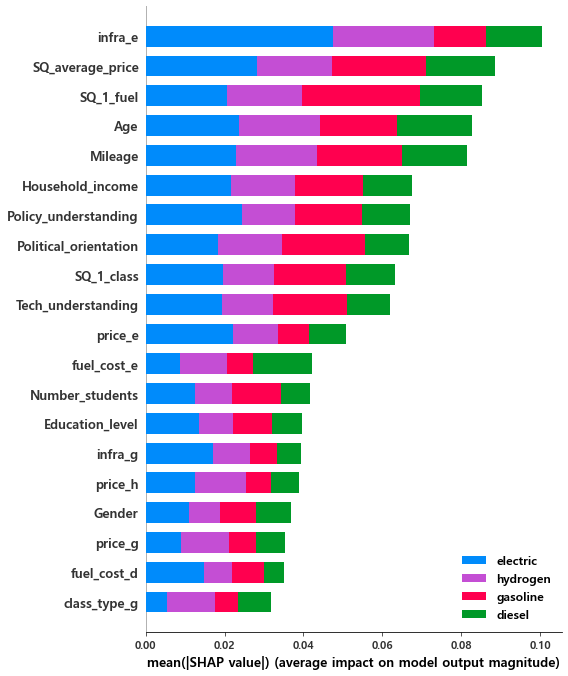

In [8]:
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
shap.summary_plot(shap_values,x.values,
                  plot_type='bar',
                  class_names=class_names,
                  feature_names=x.columns)

# 결과 분석 - Gasoline

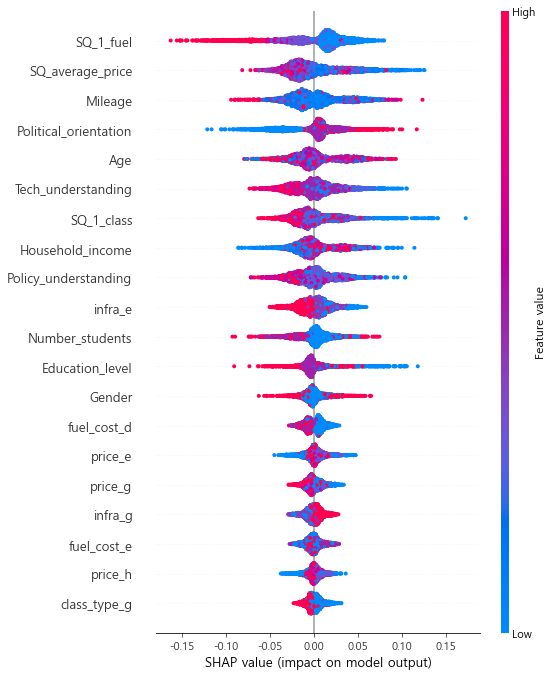

In [9]:
shap.summary_plot(shap_values[0],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

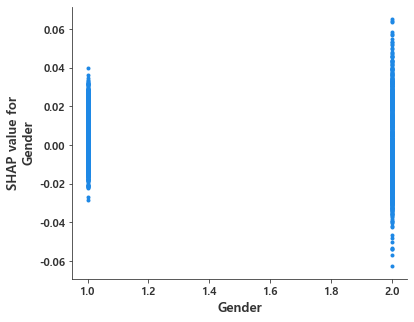

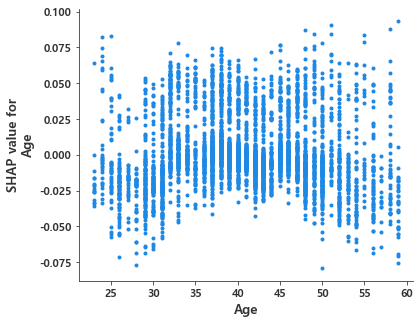

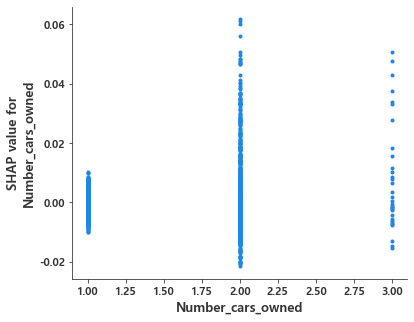

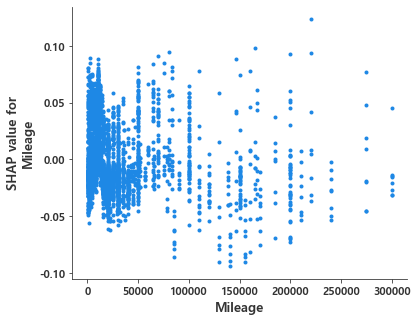

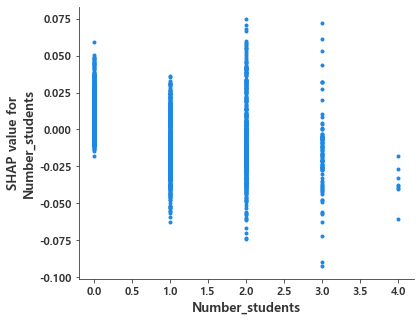

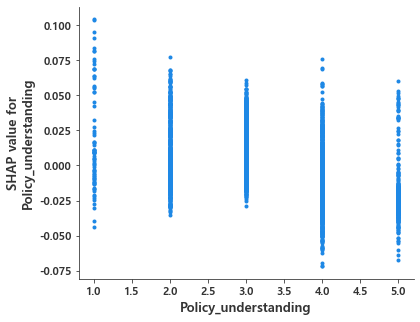

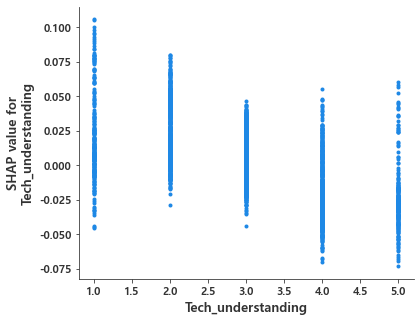

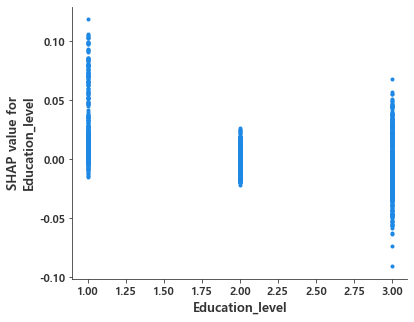

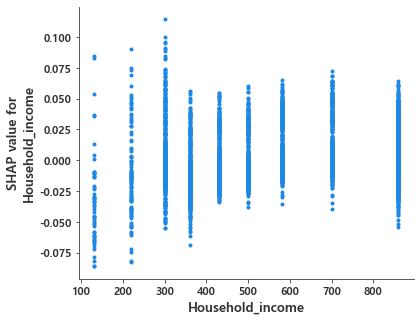

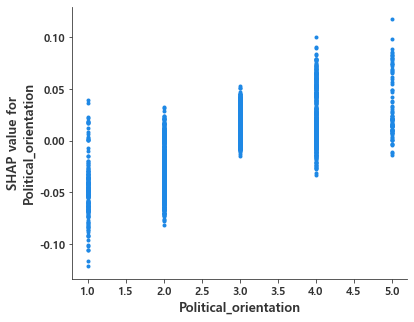

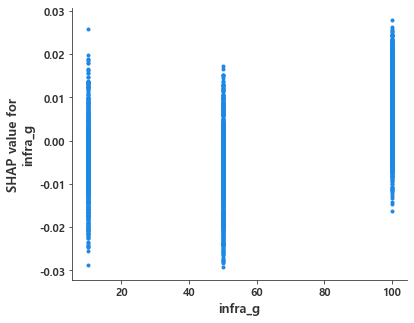

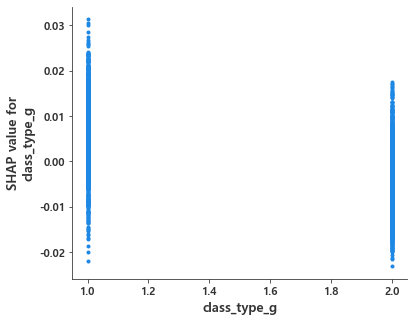

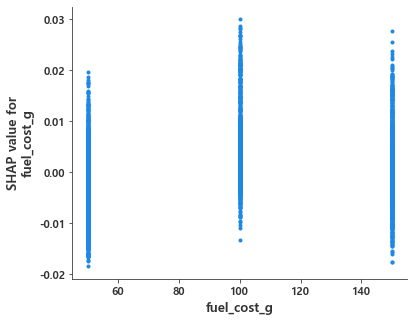

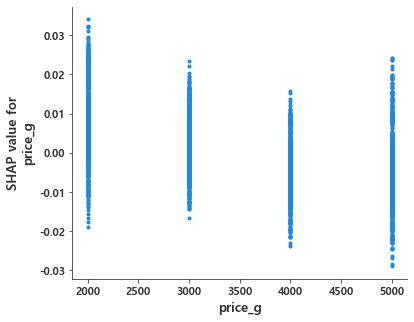

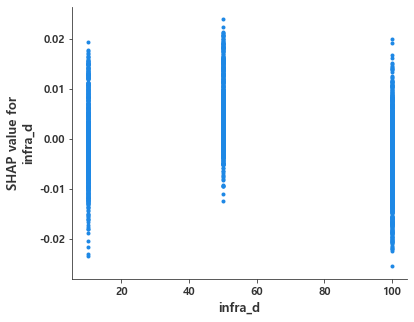

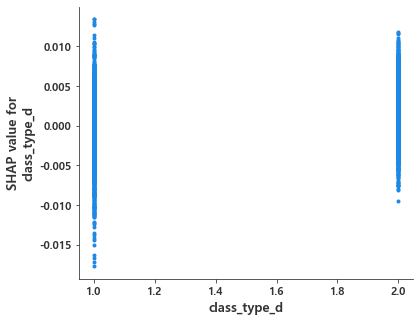

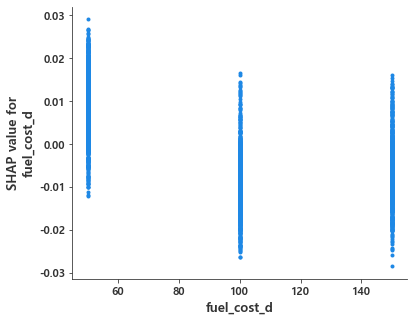

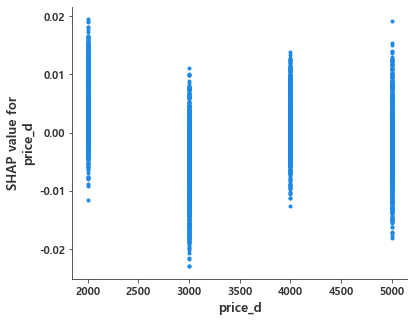

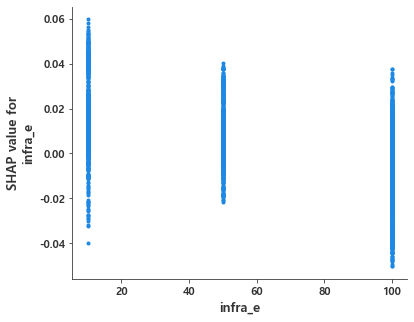

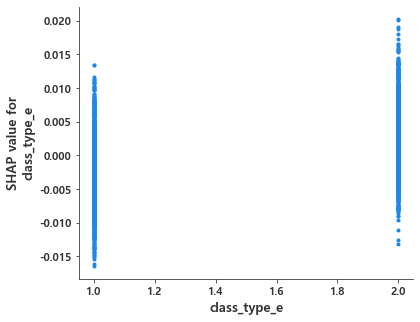

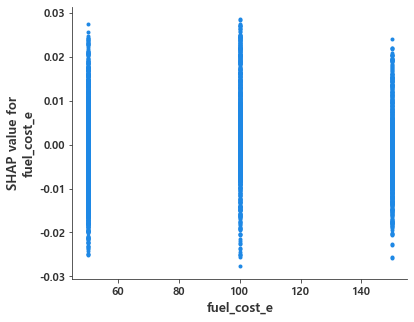

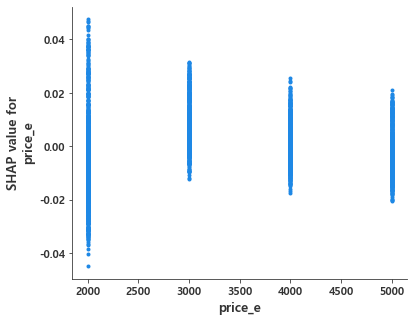

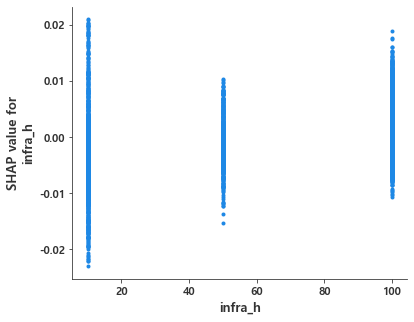

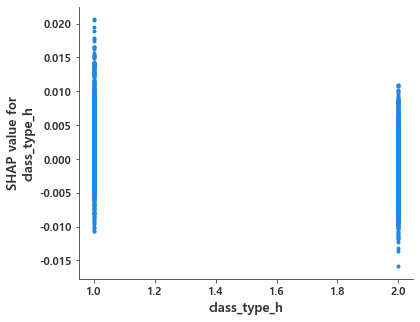

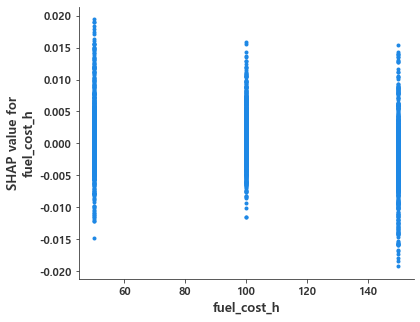

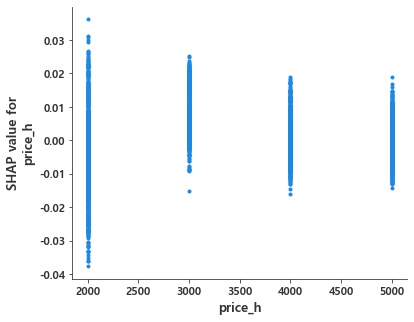

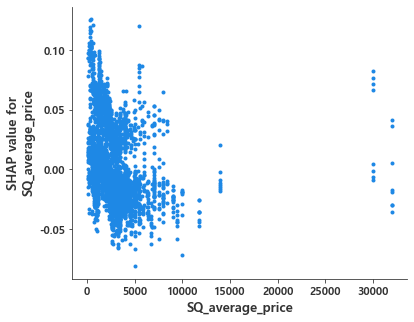

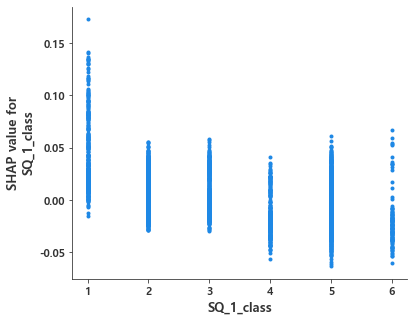

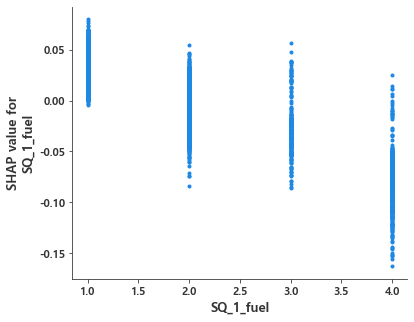

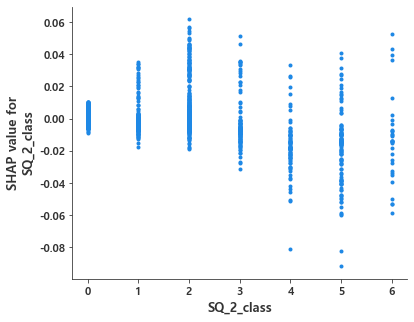

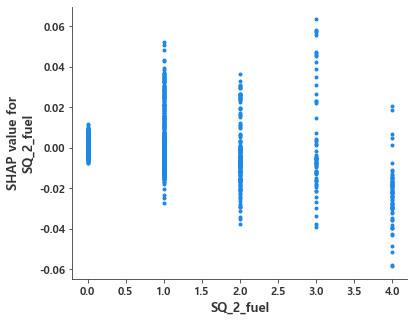

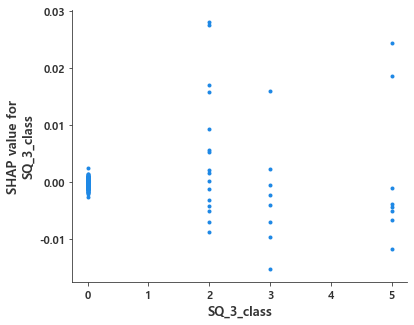

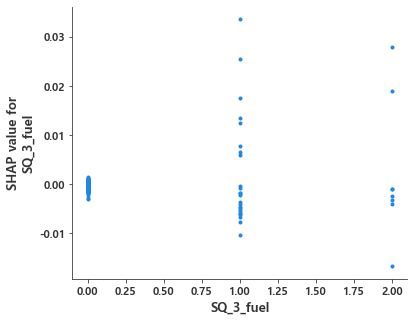

In [25]:
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
for i in range(0,33,1):
#     fig, ax = plt.subplots(figsize=(6, 5))
    shap.dependence_plot(i,
                     shap_values[0],x.values,
                     feature_names=x.columns,
                    interaction_index=None,
                    ax=None)
#     labels = ax.get_xticklabels() + ax.get_yticklabels()
#     [label.set_fontweight('bold') for label in labels]
#     [label.set_fontsize(12) for label in labels]
#     fig.show()

# 결과 분석 - Diesel

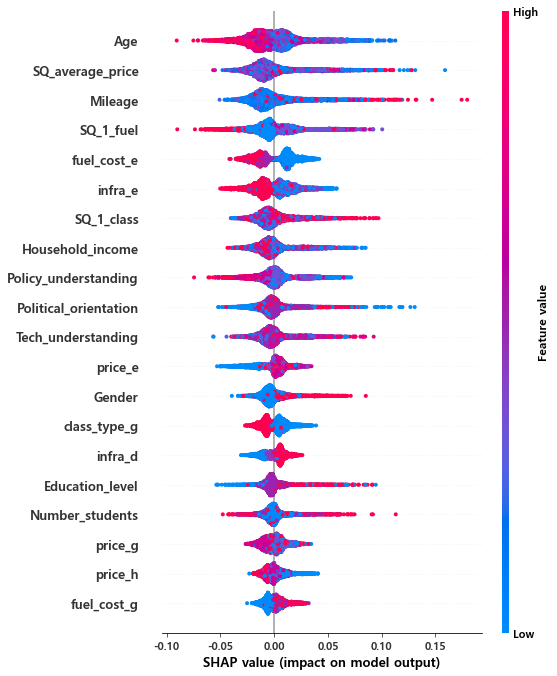

In [11]:
shap.summary_plot(shap_values[1],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

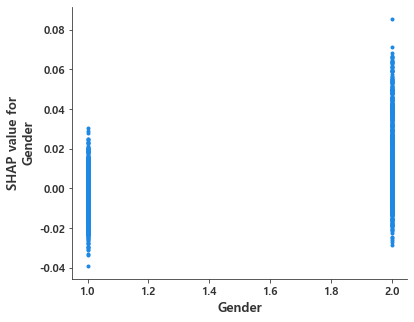

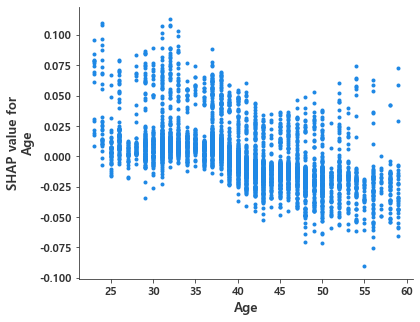

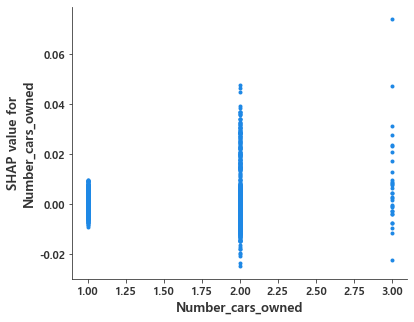

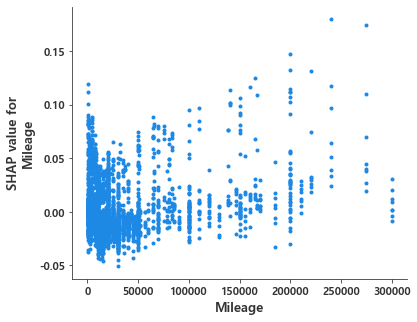

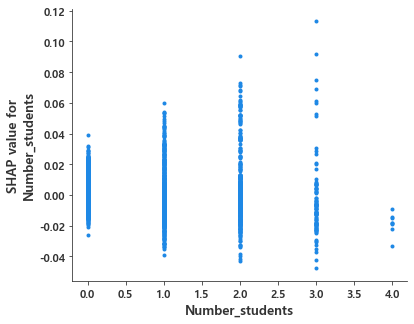

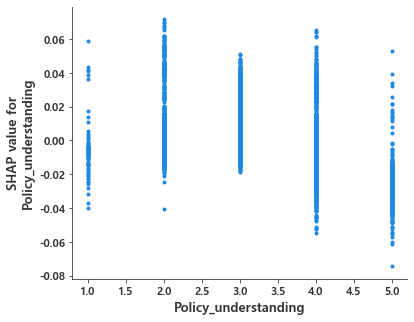

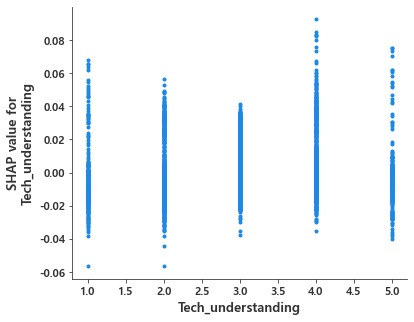

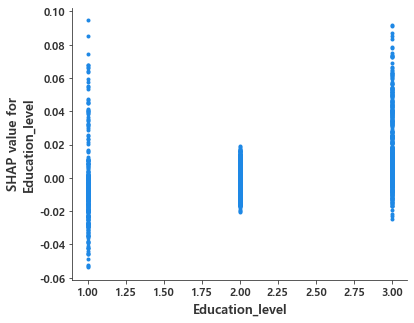

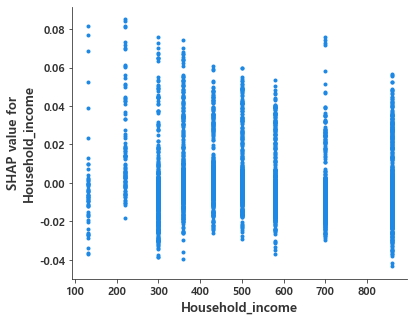

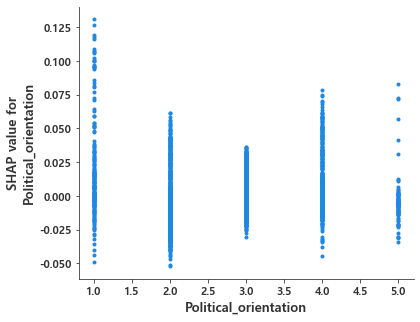

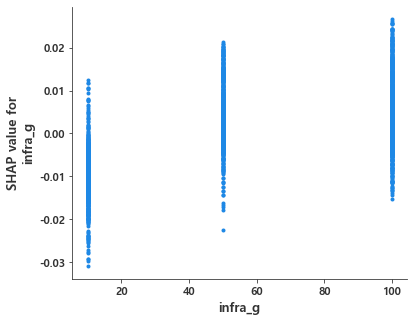

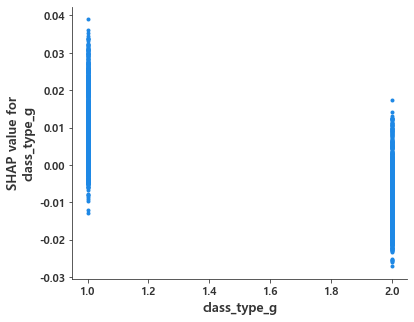

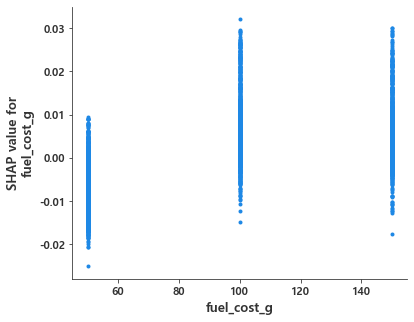

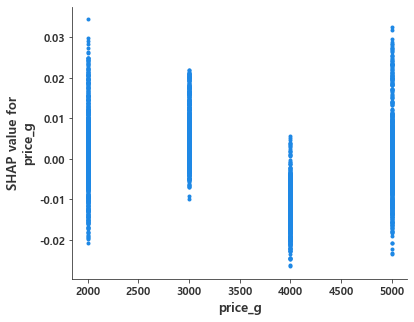

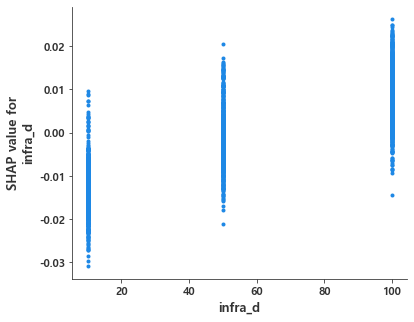

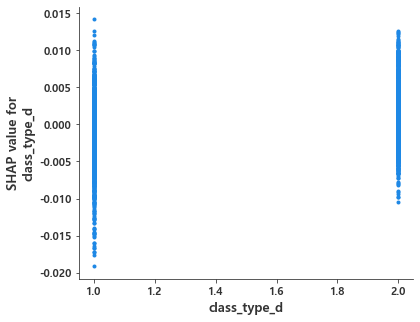

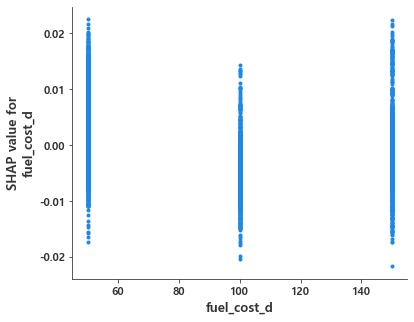

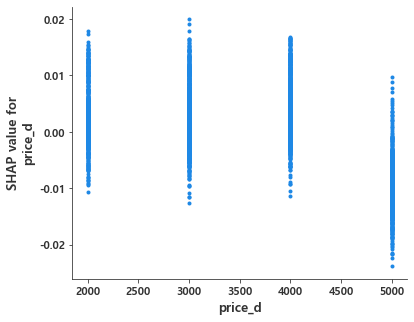

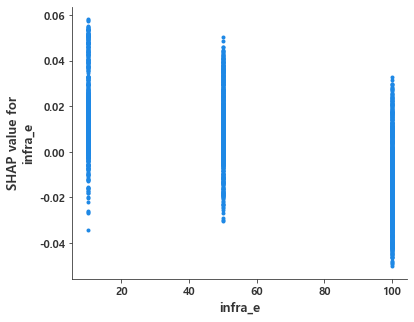

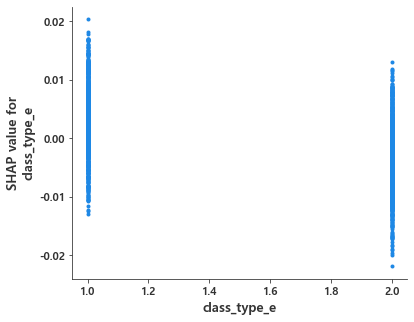

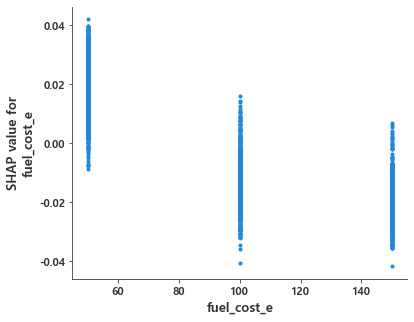

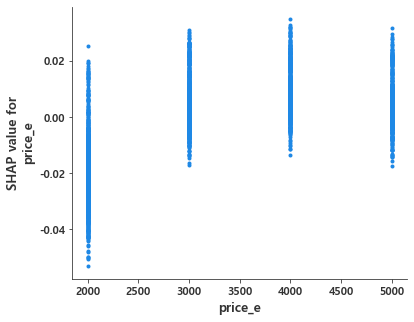

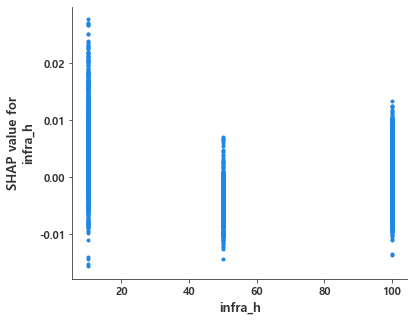

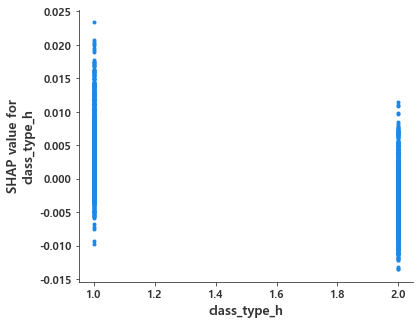

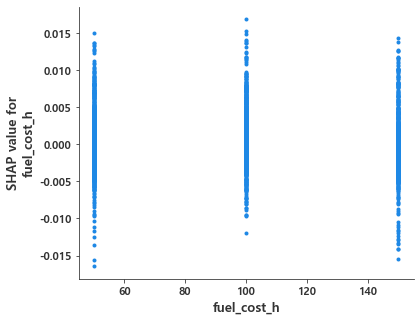

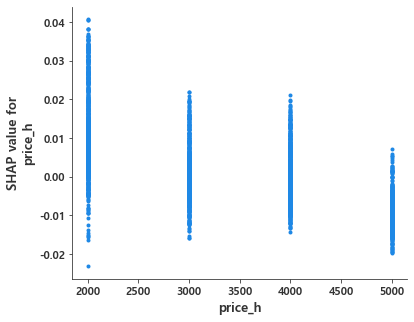

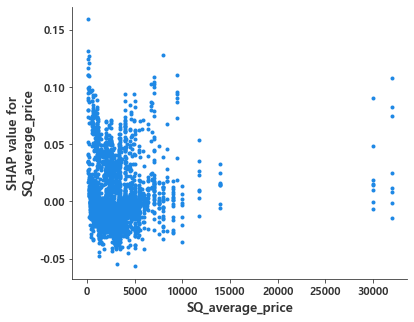

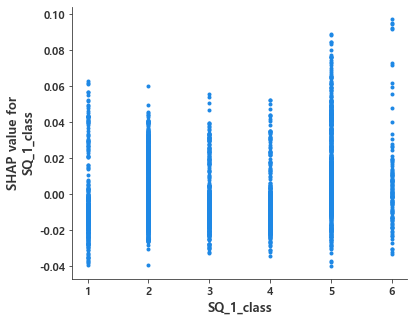

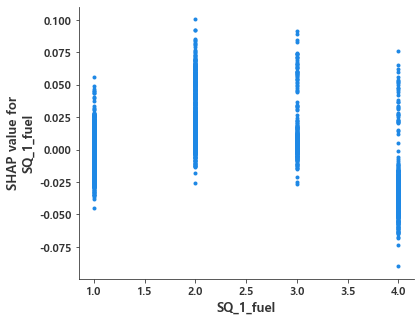

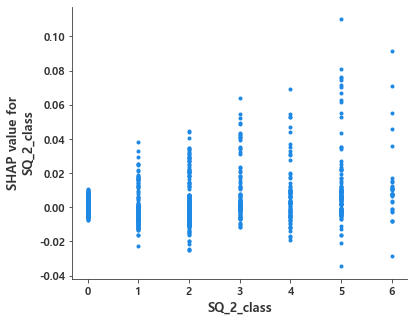

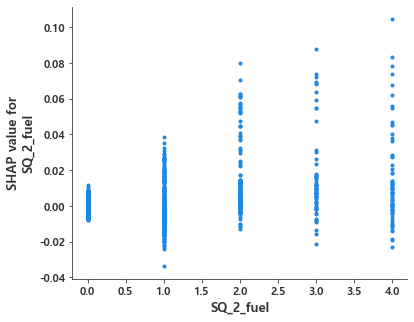

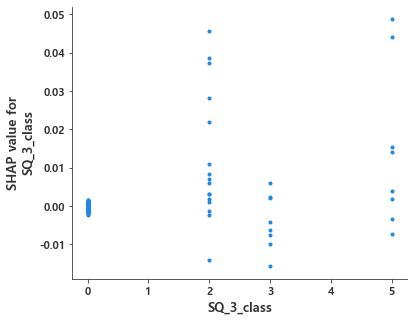

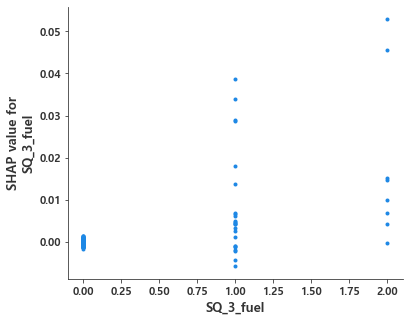

In [12]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[1],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# 결과 분석 - Electric

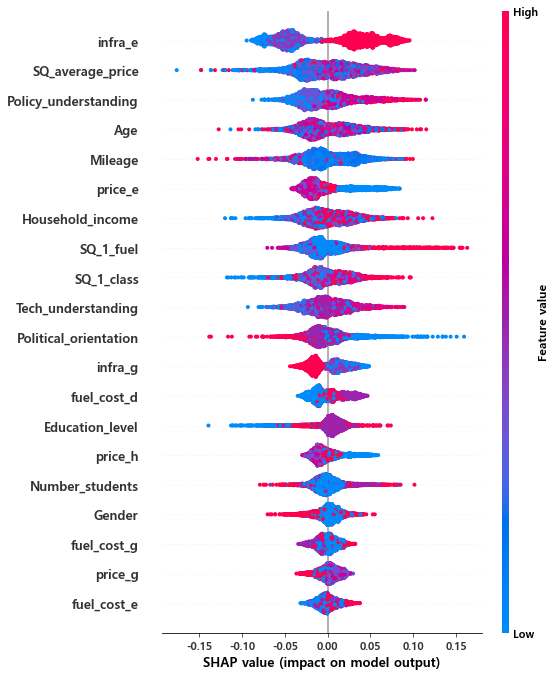

In [13]:
shap.summary_plot(shap_values[2],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

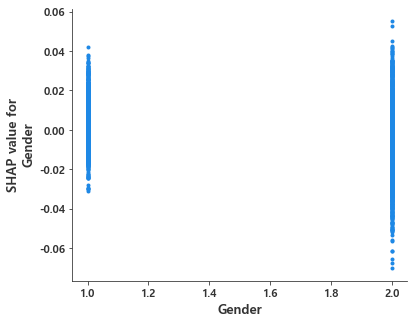

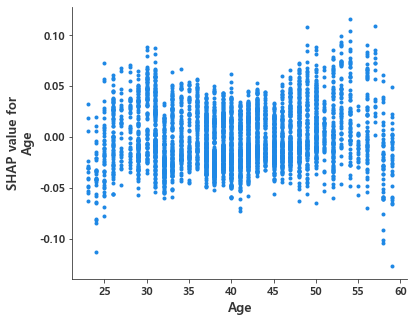

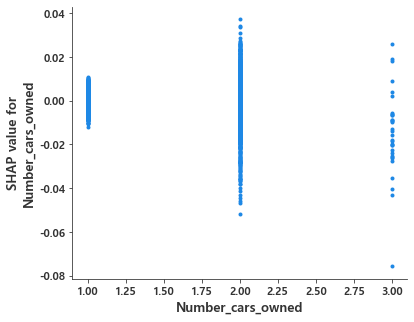

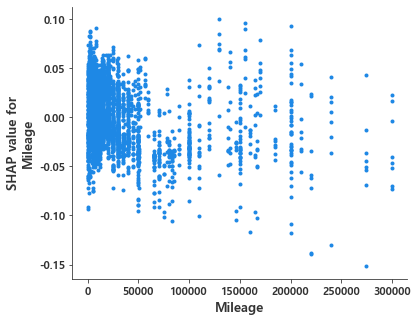

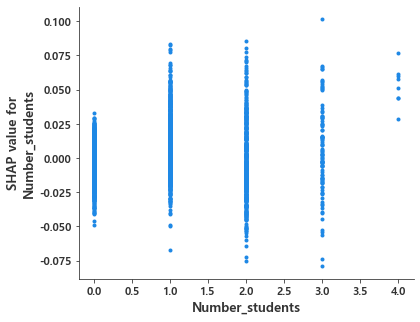

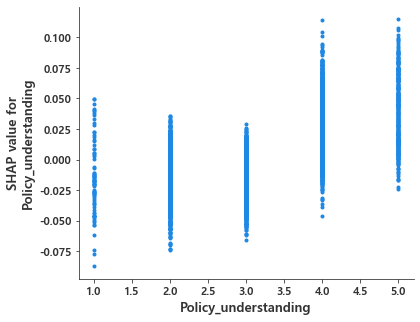

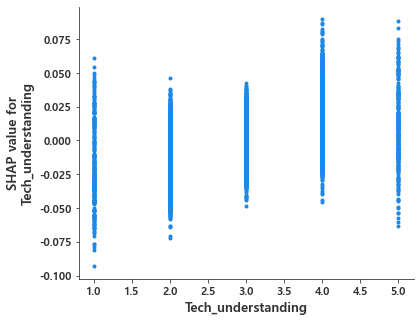

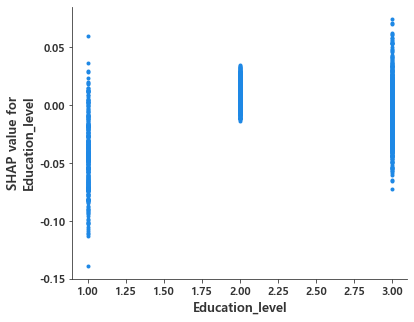

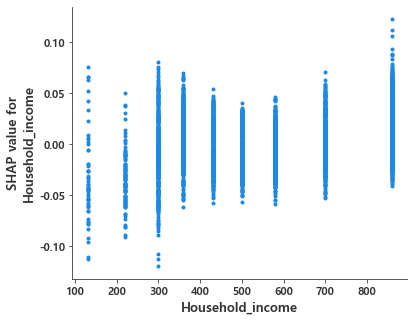

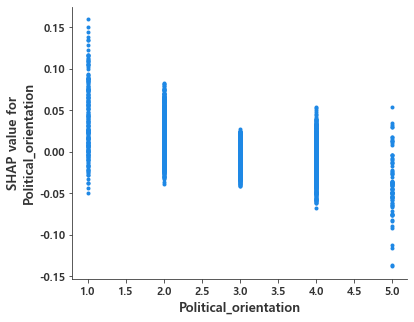

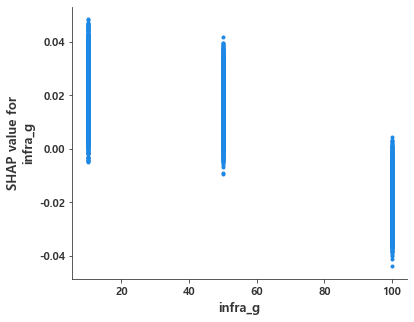

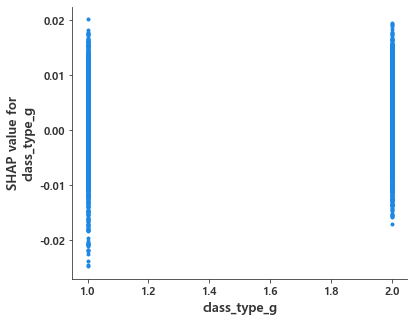

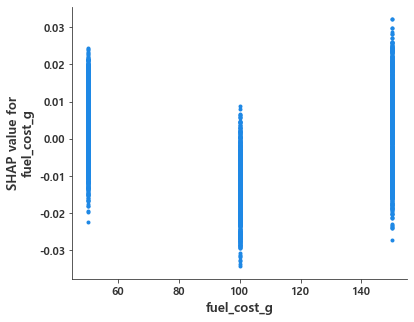

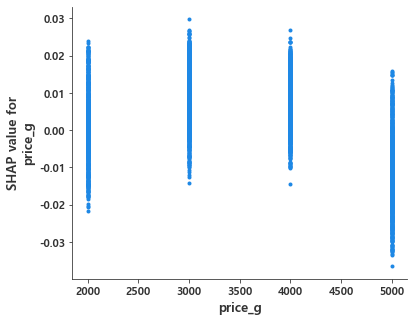

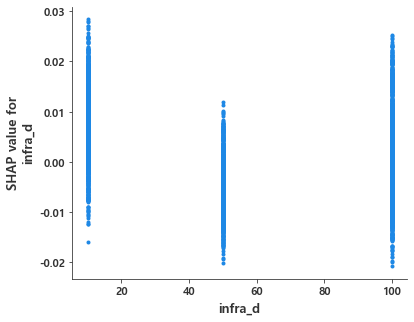

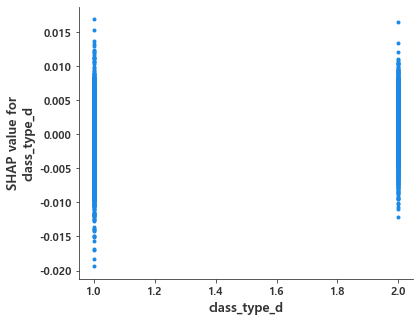

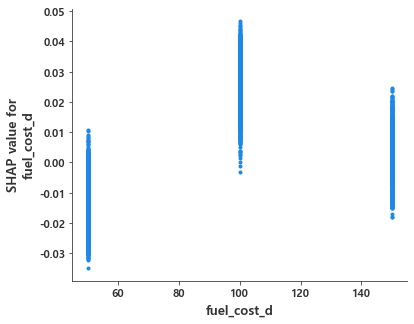

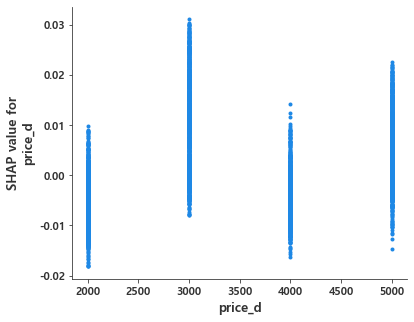

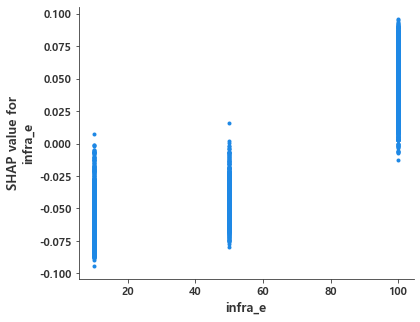

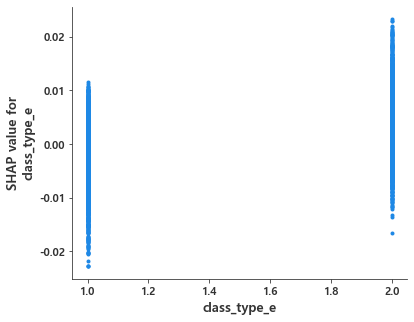

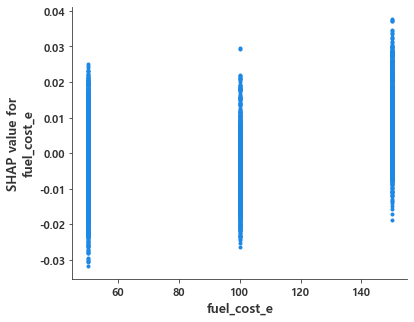

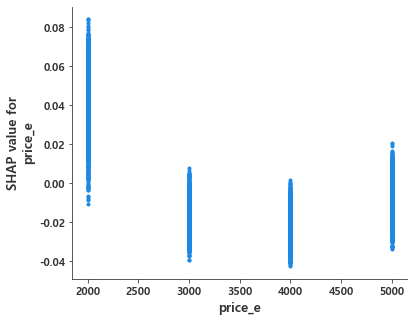

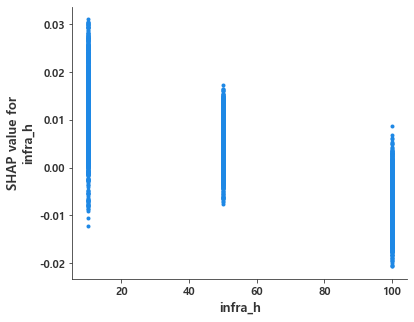

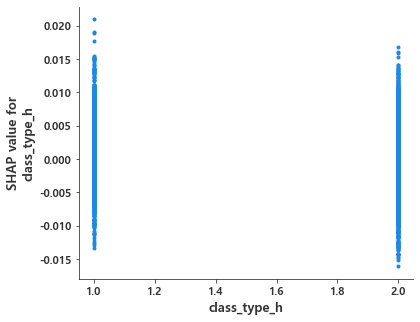

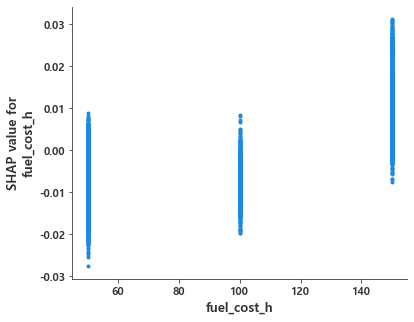

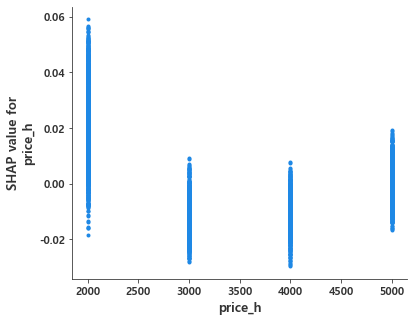

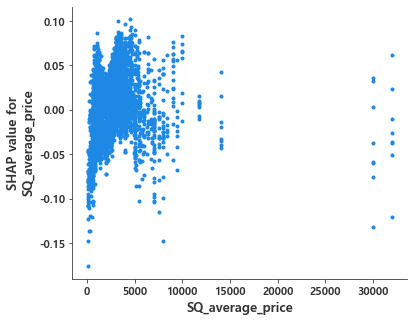

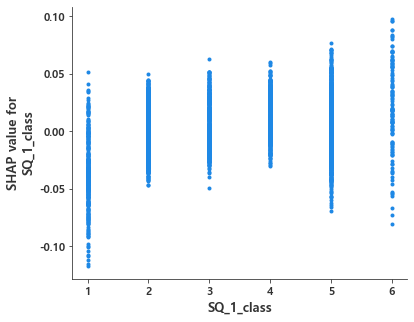

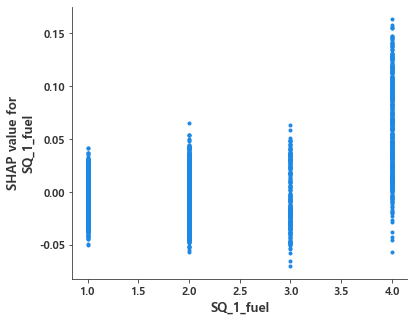

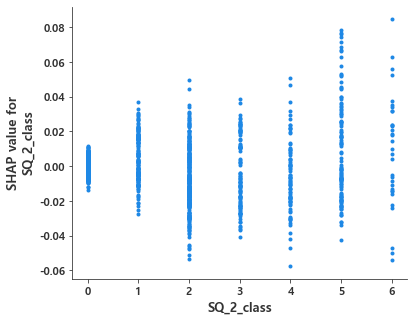

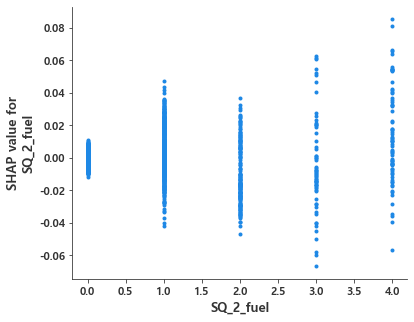

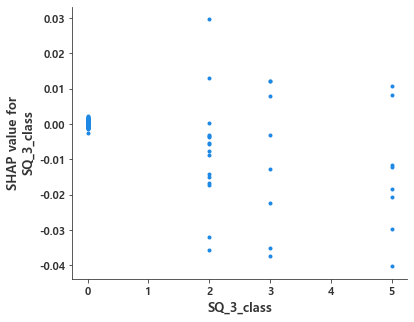

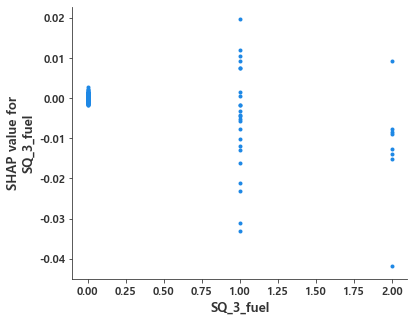

In [14]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[2],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# 결과 분석 - Hydrogen

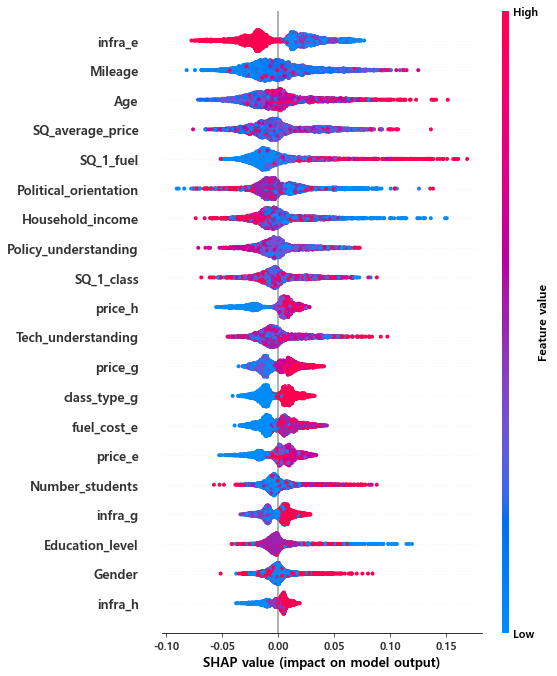

In [15]:
shap.summary_plot(shap_values[3],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

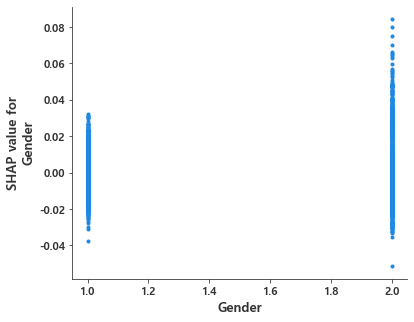

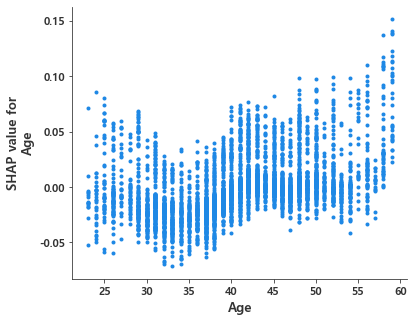

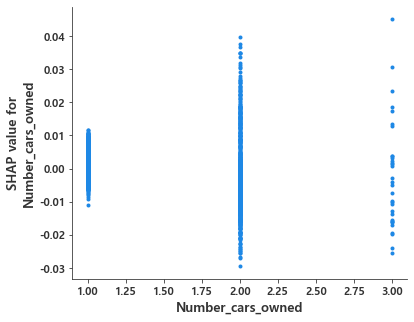

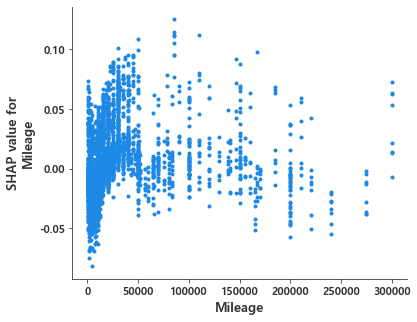

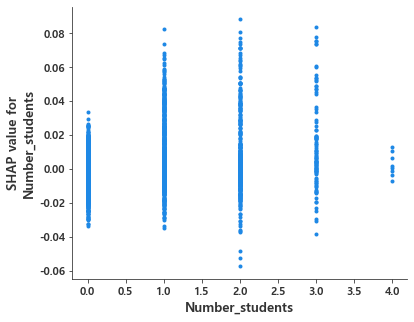

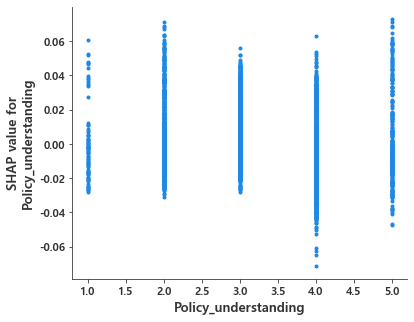

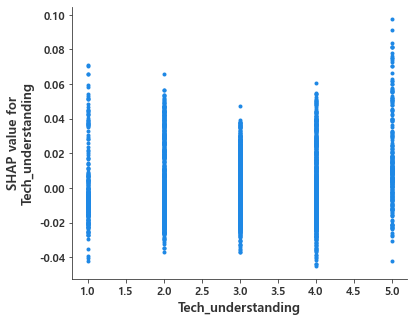

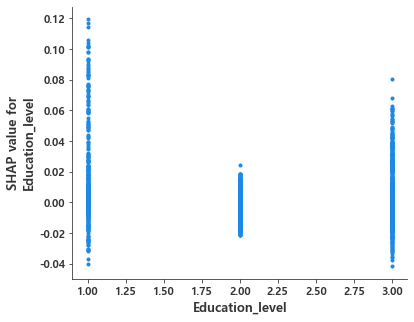

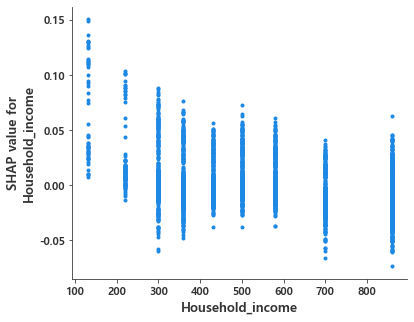

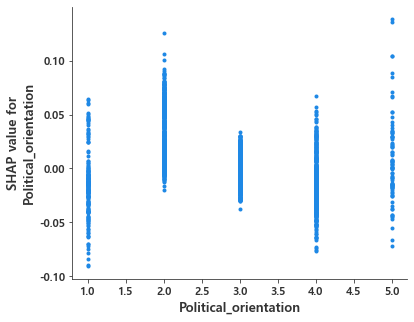

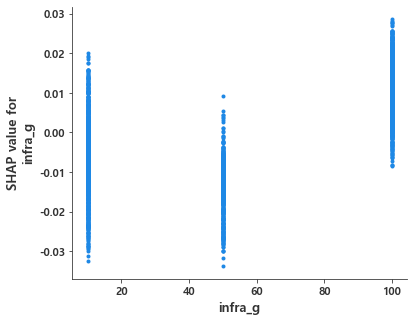

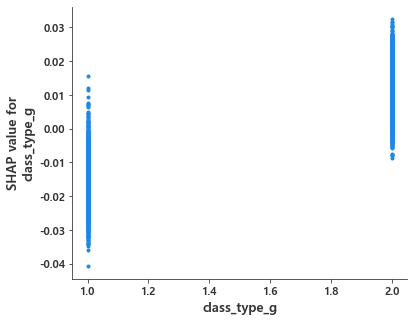

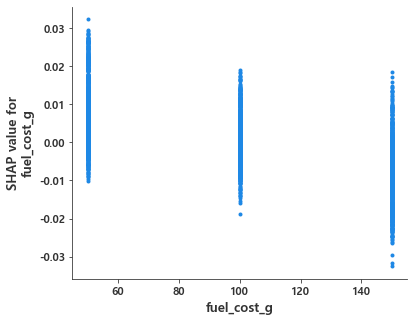

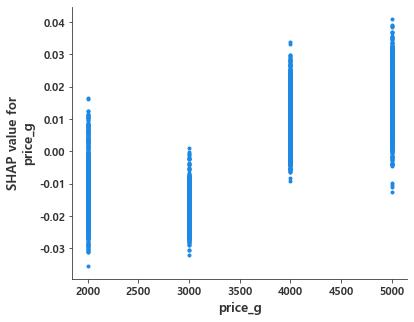

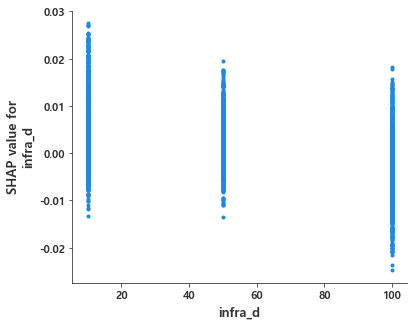

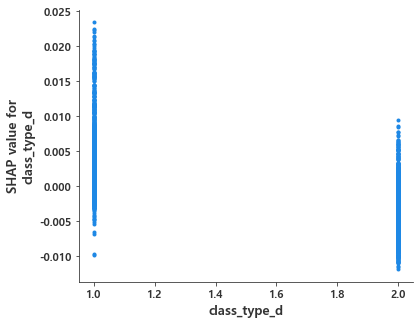

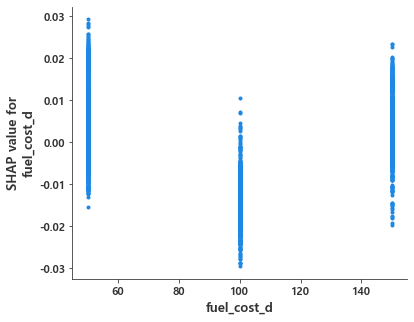

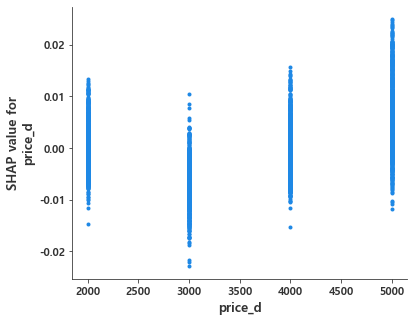

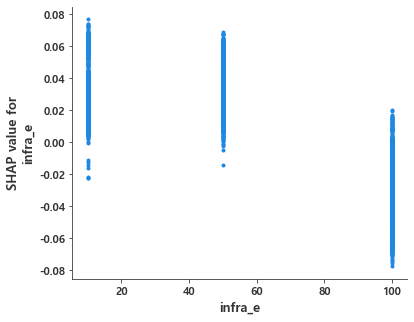

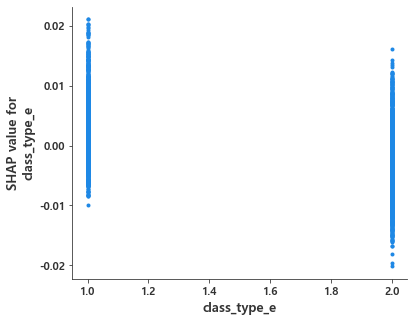

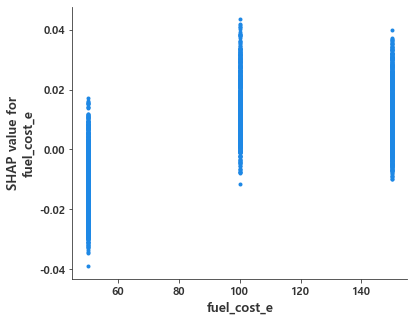

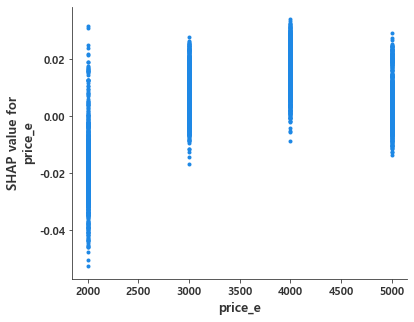

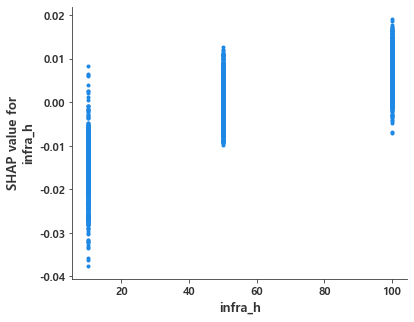

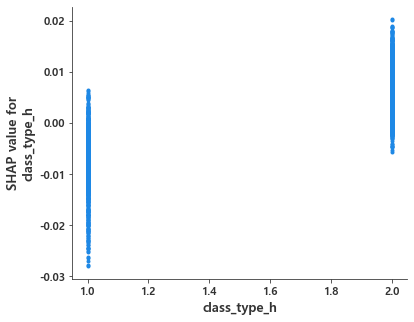

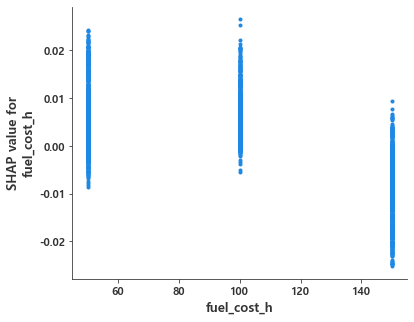

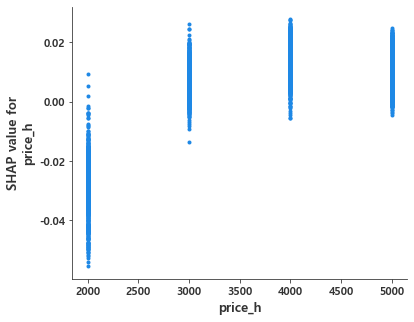

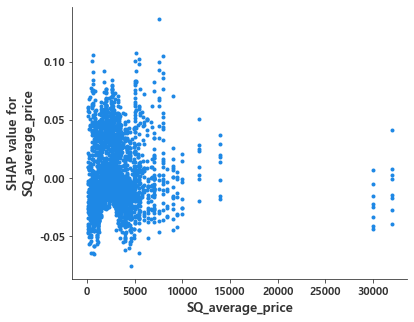

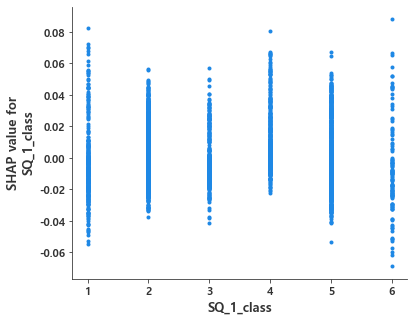

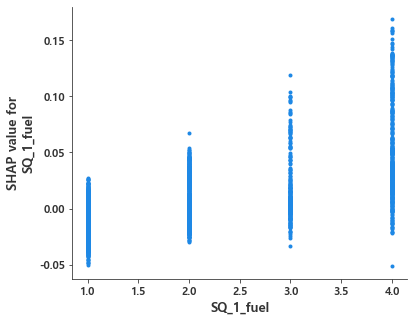

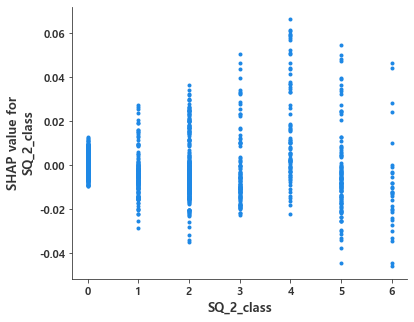

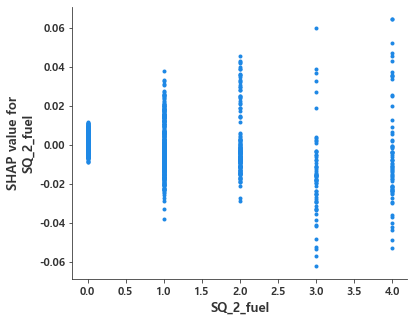

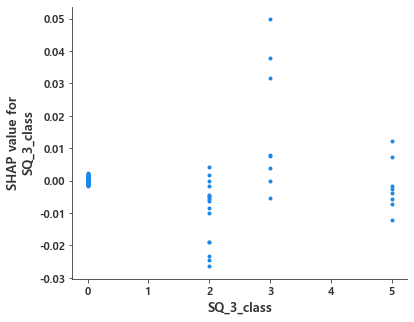

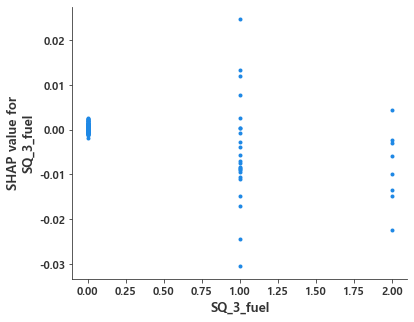

In [16]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[3],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

In [17]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[0],x.values,
                     feature_names=x.columns,
                    interaction_index="연평균주행거리")

ValueError: Could not find feature named: 연평균주행거리

In [ ]:
# result_gasoline = pd.DataFrame(shap_values[0])
# result_gasoline.to_csv("G:\\내 드라이브\\내 모든 파일들\\2_연구\\1_졸업논문\\Codes\\result_gasoline.csv")

# result_diesel = pd.DataFrame(shap_values[1])
# result_diesel.to_csv("G:\\내 드라이브\\내 모든 파일들\\2_연구\\1_졸업논문\\Codes\\result_diesel.csv")

# result_electric = pd.DataFrame(shap_values[2])
# result_electric.to_csv("G:\\내 드라이브\\내 모든 파일들\\2_연구\\1_졸업논문\\Codes\\result_electric.csv")

# result_hydrogen = pd.DataFrame(shap_values[3])
# result_hydrogen.to_csv("G:\\내 드라이브\\내 모든 파일들\\2_연구\\1_졸업논문\\Codes\\result_hydrogen.csv")

In [ ]:
# Import data

bargraph = pd.read_excel("bargraph.xlsx")
bargraph.head()

In [ ]:
plt.barh()

In [ ]:
bargraph["gasoline"].sort_values().plot(
    kind="barh",
    figsize=(10,20),
    grid=False,
    title="Shap values of each feature for the choice of gasoline",
    y=bargraph["feature"]
)

In [ ]:
shap_g = bargraph['gasoline']
g = bargraph['g']
shap_d = bargraph['diesel']
d = bargraph['d']
shap_e = bargraph['electric']
e = bargraph['e']
shap_h = bargraph['hydrogen']
h = bargraph['h']

In [ ]:


plt.figure(figsize=(10,20))
plt.barh(g,shap_g)

In [ ]:
plt.figure(figsize=(10,20))
plt.barh(d,shap_d).invert_yaxis()

In [ ]:
plt.figure(figsize=(10,20))
plt.barh(e,shap_e)

In [ ]:
plt.figure(figsize=(10,20))
plt.barh(h,shap_h)